# Imports

In [2]:
# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

# PyROOT imports
#from ROOT import TTree, TFile -- cannot install ROOT using conda on Windows, using uproot instead

# SciKitHep imports
import uproot
import hist

# Setup plotting

In [3]:
plt.rcParams['figure.figsize'] = [10, 8]
font = {'family' : 'serif','weight' : 'normal','size'   : 22}
plt.rc('font', **font)

# Get data

#### List contents of file using pyroot

In [4]:
path = '/Users/lizzi/MSci Project/ch3t_sr1_fixed.root'
#file = TFile.Open(path)
#tree = file.Get('Events')

#### Read data with uproot

In [5]:
# Read some or all branches into memory in an akward array

data = uproot.concatenate(f'{path}:Events'
                         # filter_name=['runID','evtID']
                         )
#data.fields

In [6]:
# Read in pointers to every TBranch of the TTree

data2 = uproot.open(f'{path}:Events')
#data2.keys()

# Read in 5000000 events at a time as arrays
for batch in data2.iterate(step_size=500000):
    #print(repr(batch))
    print(batch.evtID[0])

65034
17066
51979


# Make a plot

In [7]:
# Define some useful axes

r_axis = hist.axis.Regular(1010,-1,60,name="r_axis",label="r",underflow=False,overflow=False)
drift_axis = hist.axis.Regular(2000,-1000000,1000000,name="drift_axis",label="drift_time",underflow=False,overflow=False)

S2_axis = hist.axis.Regular(1000,-40,4000,name="S2_axis",label="S2_area",underflow=False,overflow=False)
S1_axis = hist.axis.Regular(1000,-800,80000,name="S1_axis",label="S1_area",underflow=False,overflow=False)

In [8]:
# Define some useful cuts

r_cut = ((data.S2_x_cm**2 + data.S2_y_cm**2)**0.5 < 65)
drift_cut = ((70000 < data.drift_time) & (data.drift_time < 900000))
fiducial_cut = (r_cut & drift_cut)
S2_size_cut = ((data.S2_corrected_area/47.07) < 200)

S2o_cut = (data.S1_area == -999)

[Text(0.5, 0, 'Radius [cm]'),
 Text(0, 0.5, '-Drift [ns]'),
 (-1000000.0, 50000.0)]

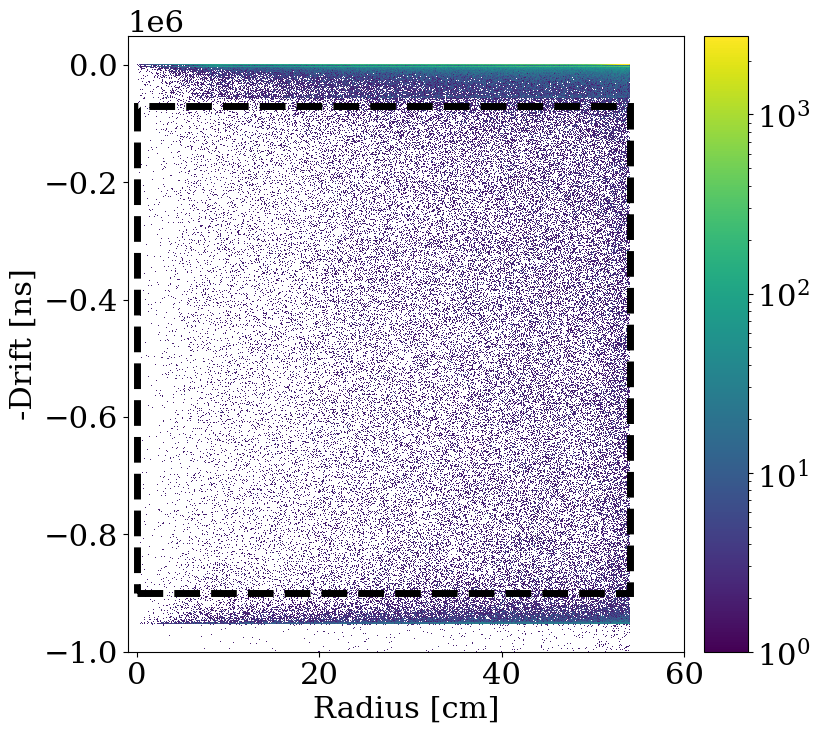

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

r_drift_hist = hist.Hist(r_axis,drift_axis)
r_drift_hist.fill((data.S2_x_cm**2 + data.S2_y_cm**2)**0.5,-data.drift_time)
r_drift_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

drift_cut_rec = Rectangle((0,-900000),54,900000-70000,fill=False,color='black',linewidth=5,linestyle='--')
ax.add_patch(drift_cut_rec)

ax.set(xlabel='Radius [cm]',ylabel='-Drift [ns]',ylim=[-1000000,50000])

[Text(0.5, 0, 'Uncorrected S2 area [phd]'), Text(0, 0.5, 'Counts')]

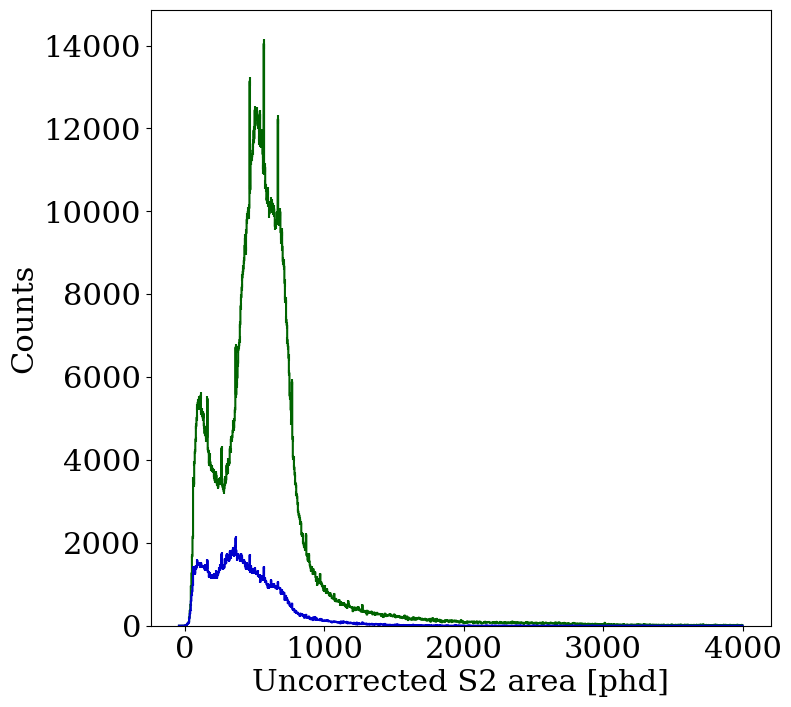

In [99]:
fig, ax = plt.subplots(figsize=(8,8))

S2_hist = hist.Hist(S2_axis)
S2_hist.fill(data.S2_area)
S2_hist.plot(color='darkgreen')

S2o_hist = hist.Hist(S2_axis)
S2o_hist.fill(data.S2_area[S2o_cut])
S2o_hist.plot(color='mediumblue')

ax.set(xlabel='Uncorrected S2 area [phd]',ylabel='Counts')

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x000001F2174255E0>, cbar=<matplotlib.colorbar.Colorbar object at 0x000001F217425700>)

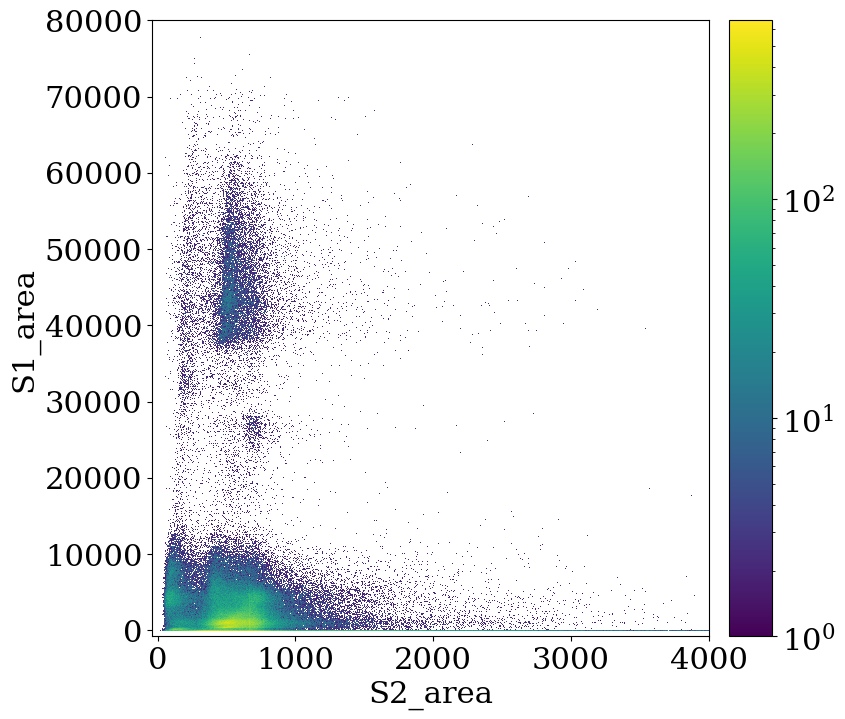

In [113]:
fig, ax = plt.subplots(figsize=(8,8))

S2S1_hist = hist.Hist(S2_axis,S1_axis)
S2S1_hist.fill(data.S2_area,data.S1_area)
S2S1_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

#ax.set(xlim=[-2500,3000],ylabel='Counts',yscale='log')
#ax.set(xlabel='Uncorrected S2 area [phd]',ylabel='Counts')

In [25]:
s1_cut = ((0 < data.S2_area) & (data.S2_area < 200))
s2_cut = ((0 < data.S1_area) & (data.S1_area < 10000))
cut = s1_cut & s2_cut & fiducial_cut

for ii in range(10):
    print('%i\t%i'%(data.runID[cut][ii],data.evtID[cut][ii]))

8136	65113
8136	65316
8136	66407
8136	66622
8136	67178
8136	67322
8155	20485
8155	20746
8155	20853
8155	21215


In [7]:
print(data.runID)

[8136, 8136, 8136, 8136, 8136, 8136, 8136, ... 8132, 8132, 8132, 8132, 8132, 8132]


Recreating plots 
- not sure which key is number of detected es - should be proportional to area? 


In [12]:
# Defining some axes
x_axis = hist.axis.Regular(600,-60,60,name="x_axis",label="x",underflow=False,overflow=False)
y_axis = hist.axis.Regular(600,-60,60,name="y_axis",label="y",underflow=False,overflow=False)

S2_size_axis = hist.axis.Regular(4000,0,4000,name="S2_size_axis",label="S2_size",underflow=False,overflow=False)
badarea_axis = hist.axis.Regular(4000,1,5000000,name="badarea_axis",label="bad",underflow=False,overflow=False)

S1_area_corr_axis = hist.axis.Regular(1000,-0,10000,name="S1_area_corr_axis",label="S1_corr",underflow=False,overflow=False)
#prexisiting S1_axis

S2_area_corr_axis = hist.axis.Regular(1000,0,4000000,name="S2_area_corr_axis",label="S2_corr",underflow=False,overflow=False)
S2_axis2 = hist.axis.Regular(1000,-800,80000,name="S2_axis2",label="S2_axis2",underflow=False,overflow=False)
S2_XY_corr_axis = hist.axis.Regular(1000,-800,80000,name="S2_XY_axis",label="S2_XY_axis",underflow=False,overflow=False)



[Text(0.5, 0, '$x_{S2}$ [cm]'),
 Text(0, 0.5, '$y_{S2}$ [cm]'),
 Text(0.5, 1.0, 'S2 Size < 200 es')]

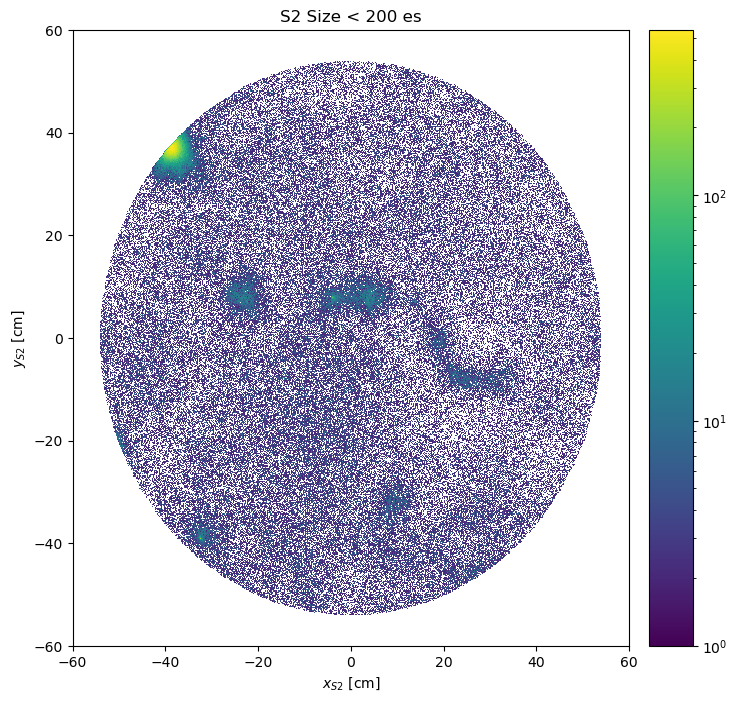

In [14]:
# X-Y histogram

fig, ax = plt.subplots(figsize=(8,8))
xy_hist = hist.Hist(x_axis,y_axis)
xy_hist.fill(data.S2_x_cm[S2_size_cut],data.S2_y_cm[S2_size_cut])
xy_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

ax.set(xlabel=r'$x_{S2}$ [cm]',ylabel=r'$y_{S2}$ [cm]', title = r'S2 Size < 200 es')

[(0.0, 4000.0), (0.0, 4000.0)]

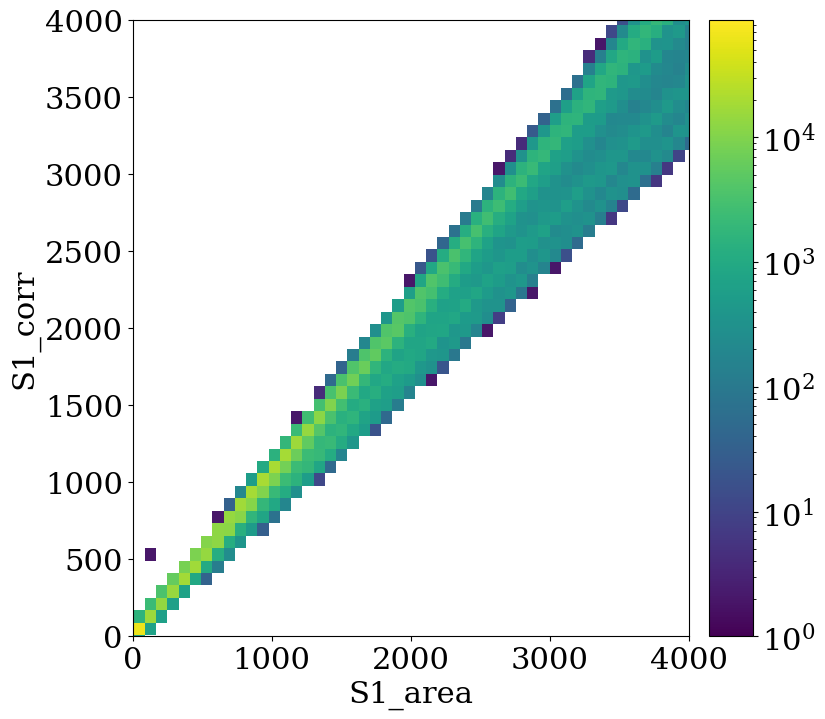

In [118]:
# S1_area vs S1_corrected_area

fig, ax = plt.subplots(figsize=(8,8))
xy_hist = hist.Hist(S1_axis,S1_area_corr_axis)
xy_hist.fill(data.S1_area,data.S1_corrected_area)
xy_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

ax.set(xlim=[0,4000], ylim=[0,4000])


[(-800.0, 10000.0)]

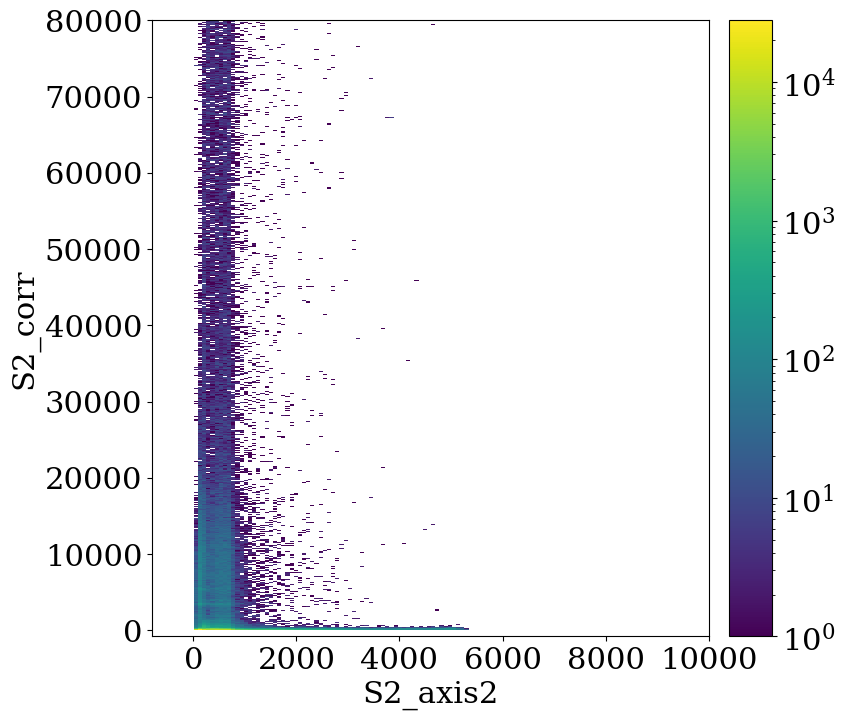

In [117]:
# S2_area vs S2_corrected_area

fig, ax = plt.subplots(figsize=(8,8))
xy_hist = hist.Hist(S2_axis2,S2_area_corr_axis)
xy_hist.fill(data.S2_area,data.S2_corrected_area)
xy_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

ax.set(xlim =[-800, 10000])

[(-800.0, 10000.0)]

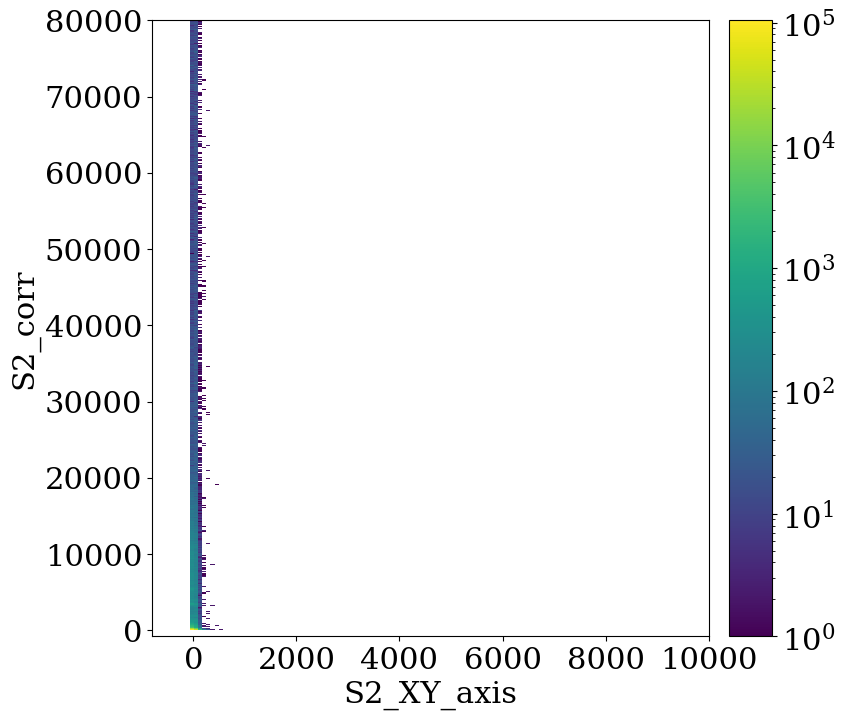

In [122]:
# S2_corrected_area vs S2_XY_corrected

fig, ax = plt.subplots(figsize=(8,8))
xy_hist = hist.Hist(S2_XY_corr_axis,S2_area_corr_axis)
xy_hist.fill(data.S2_XY_corrected_area,data.S2_corrected_area)
xy_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

ax.set(xlim =[-800, 10000])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x000001F248713FD0>, cbar=<matplotlib.colorbar.Colorbar object at 0x000001F2487A7250>)

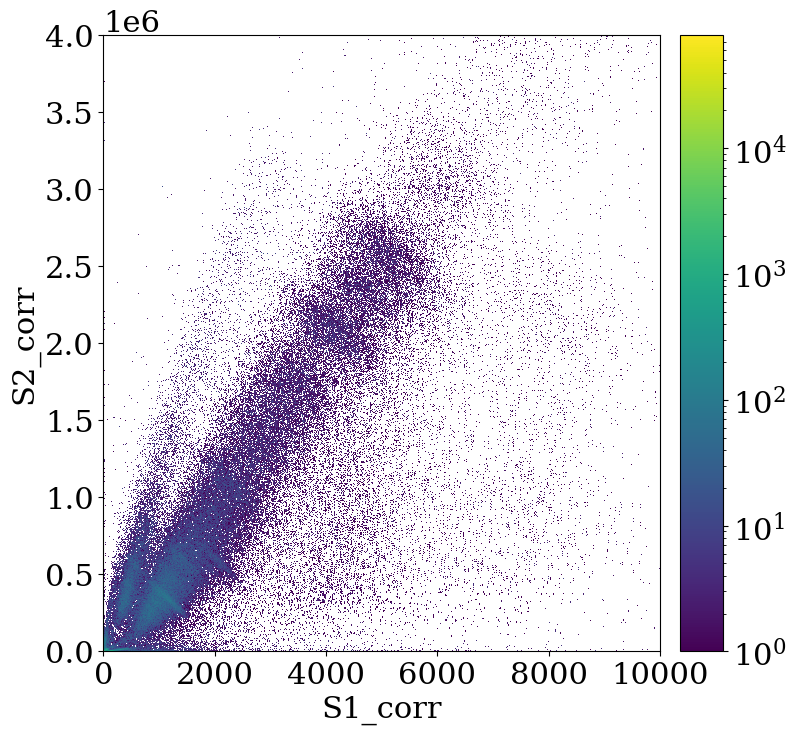

In [132]:
# S2_corrected_area vs S1_corrected_area

fig, ax = plt.subplots(figsize=(8,8))
xy_hist = hist.Hist(S1_area_corr_axis,S2_area_corr_axis)
xy_hist.fill(data.S1_corrected_area,data.S2_corrected_area)
xy_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

#ax.set(xlim = [0, 10000], ylim = [0,10000])

[Text(0.5, 0, 'S2 Size'), Text(0, 0.5, 'Badarea')]

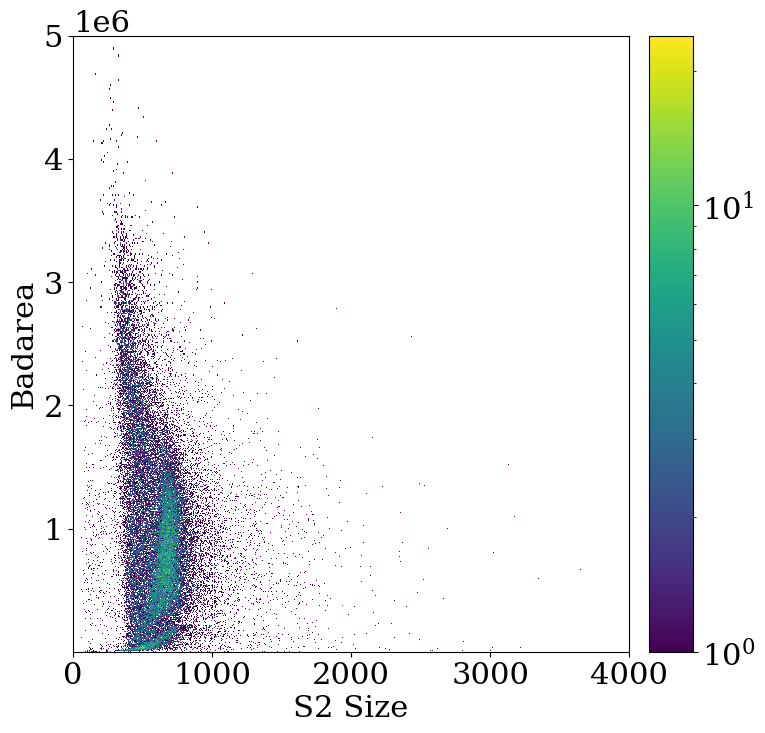

In [92]:
# Badarea hist

fig, ax = plt.subplots(figsize=(8,8))
xy_hist = hist.Hist(S2_size_axis,badarea_axis)
xy_hist.fill(data.S2_area,data.evt_bad_area)
xy_hist.plot(norm=mpl.colors.LogNorm(),cmap='viridis')

ax.set(xlabel=r'S2 Size',ylabel=r'Badarea')
